In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

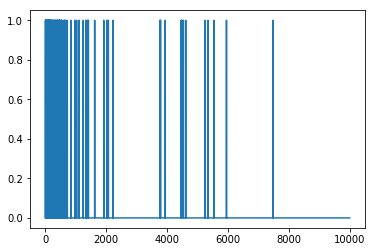

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    # 'input_shape' is only required here so that '.summary' works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.4818 - acc: 0.7910 - binary_crossentropy: 0.4818 - val_loss: 0.3320 - val_acc: 0.8754 - val_binary_crossentropy: 0.3320
Epoch 2/20
 - 2s - loss: 0.2467 - acc: 0.9106 - binary_crossentropy: 0.2467 - val_loss: 0.2840 - val_acc: 0.8860 - val_binary_crossentropy: 0.2840
Epoch 3/20
 - 2s - loss: 0.1821 - acc: 0.9362 - binary_crossentropy: 0.1821 - val_loss: 0.2890 - val_acc: 0.8850 - val_binary_crossentropy: 0.2890
Epoch 4/20
 - 2s - loss: 0.1467 - acc: 0.9497 - binary_crossentropy: 0.1467 - val_loss: 0.3126 - val_acc: 0.8791 - val_binary_crossentropy: 0.3126
Epoch 5/20
 - 2s - loss: 0.1223 - acc: 0.9597 - binary_crossentropy: 0.1223 - val_loss: 0.3392 - val_acc: 0.8736 - val_binary_crossentropy: 0.3392
Epoch 6/20
 - 2s - loss: 0.1021 - acc: 0.9677 - binary_crossentropy: 0.1021 - val_loss: 0.3684 - val_acc: 0.8702 - val_binary_crossentropy: 0.3684
Epoch 7/20
 - 2s - loss: 0.0857 - acc: 0.9745 - binary_crossentropy:

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5520 - acc: 0.7845 - binary_crossentropy: 0.5520 - val_loss: 0.4381 - val_acc: 0.8577 - val_binary_crossentropy: 0.4381
Epoch 2/20
 - 2s - loss: 0.3490 - acc: 0.8904 - binary_crossentropy: 0.3490 - val_loss: 0.3393 - val_acc: 0.8782 - val_binary_crossentropy: 0.3393
Epoch 3/20
 - 2s - loss: 0.2637 - acc: 0.9150 - binary_crossentropy: 0.2637 - val_loss: 0.3001 - val_acc: 0.8870 - val_binary_crossentropy: 0.3001
Epoch 4/20
 - 2s - loss: 0.2168 - acc: 0.9295 - binary_crossentropy: 0.2168 - val_loss: 0.2873 - val_acc: 0.8876 - val_binary_crossentropy: 0.2873
Epoch 5/20
 - 2s - loss: 0.1865 - acc: 0.9398 - binary_crossentropy: 0.1865 - val_loss: 0.2863 - val_acc: 0.8854 - val_binary_crossentropy: 0.2863
Epoch 6/20
 - 2s - loss: 0.1638 - acc: 0.9469 - binary_crossentropy: 0.1638 - val_loss: 0.2879 - val_acc: 0.8860 - val_binary_crossentropy: 0.2879
Epoch 7/20
 - 2s - loss: 0.1459 - acc: 0.9542 - binary_crossentropy:

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data,
                                 train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 9s - loss: 0.3451 - acc: 0.8543 - binary_crossentropy: 0.3451 - val_loss: 0.2909 - val_acc: 0.8830 - val_binary_crossentropy: 0.2909
Epoch 2/20
 - 8s - loss: 0.1329 - acc: 0.9518 - binary_crossentropy: 0.1329 - val_loss: 0.3548 - val_acc: 0.8659 - val_binary_crossentropy: 0.3548
Epoch 3/20
 - 8s - loss: 0.0381 - acc: 0.9892 - binary_crossentropy: 0.0381 - val_loss: 0.4491 - val_acc: 0.8681 - val_binary_crossentropy: 0.4491
Epoch 4/20
 - 9s - loss: 0.0057 - acc: 0.9995 - binary_crossentropy: 0.0057 - val_loss: 0.6053 - val_acc: 0.8684 - val_binary_crossentropy: 0.6053
Epoch 5/20
 - 8s - loss: 7.0307e-04 - acc: 1.0000 - binary_crossentropy: 7.0307e-04 - val_loss: 0.6834 - val_acc: 0.8713 - val_binary_crossentropy: 0.6834
Epoch 6/20
 - 9s - loss: 1.9842e-04 - acc: 1.0000 - binary_crossentropy: 1.9842e-04 - val_loss: 0.7222 - val_acc: 0.8715 - val_binary_crossentropy: 0.7222
Epoch 7/20
 - 8s - loss: 1.2494e-04 - acc: 1.0000 - 

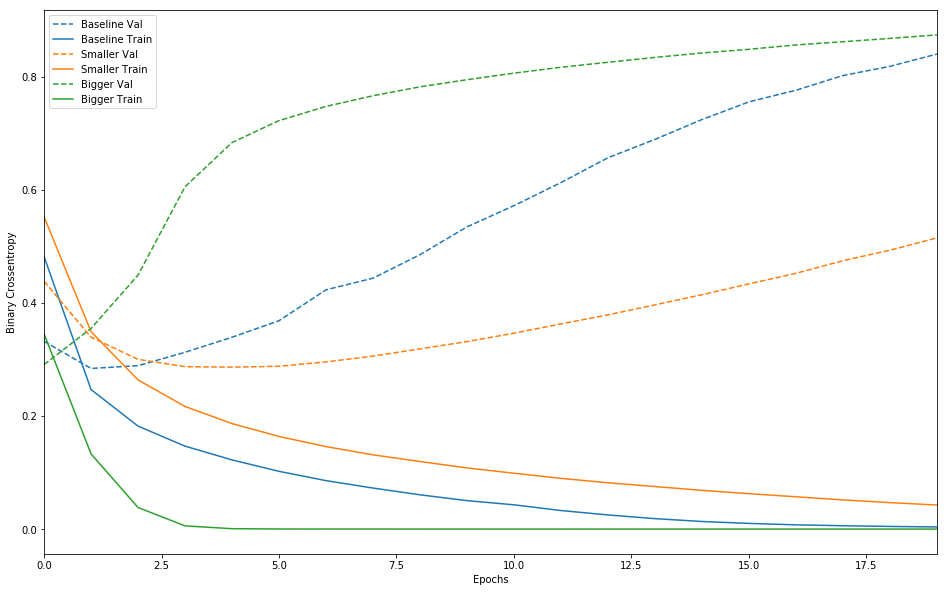

In [11]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

In [12]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5546 - acc: 0.7773 - binary_crossentropy: 0.5164 - val_loss: 0.4115 - val_acc: 0.8752 - val_binary_crossentropy: 0.3711
Epoch 2/20
 - 2s - loss: 0.3292 - acc: 0.9054 - binary_crossentropy: 0.2830 - val_loss: 0.3429 - val_acc: 0.8868 - val_binary_crossentropy: 0.2925
Epoch 3/20
 - 2s - loss: 0.2705 - acc: 0.9246 - binary_crossentropy: 0.2175 - val_loss: 0.3385 - val_acc: 0.8862 - val_binary_crossentropy: 0.2835
Epoch 4/20
 - 2s - loss: 0.2430 - acc: 0.9368 - binary_crossentropy: 0.1863 - val_loss: 0.3455 - val_acc: 0.8842 - val_binary_crossentropy: 0.2879
Epoch 5/20
 - 2s - loss: 0.2280 - acc: 0.9429 - binary_crossentropy: 0.1688 - val_loss: 0.3573 - val_acc: 0.8807 - val_binary_crossentropy: 0.2973
Epoch 6/20
 - 2s - loss: 0.2148 - acc: 0.9489 - binary_crossentropy: 0.1542 - val_loss: 0.3691 - val_acc: 0.8777 - val_binary_crossentropy: 0.3081
Epoch 7/20
 - 2s - loss: 0.2078 - acc: 0.9514 - binary_crossentropy:

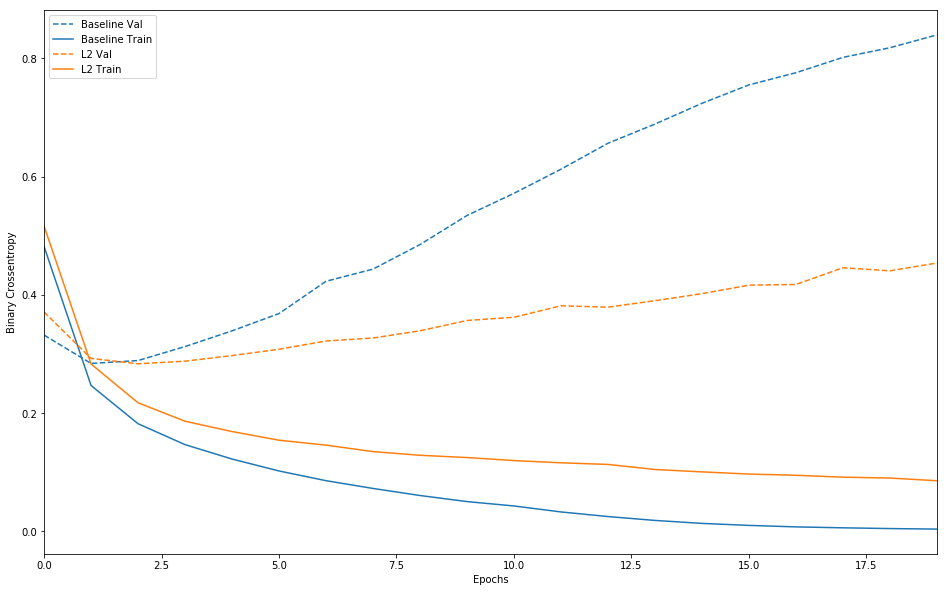

In [14]:
plot_history([('baseline', baseline_history),
             ('l2', l2_model_history)])

In [16]:
dropout_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dropout_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

dropout_model_history = dropout_model.fit(train_data, train_labels,
                                         epochs=20,
                                         batch_size=512,
                                         validation_data=(test_data, test_labels),
                                         verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6161 - acc: 0.6564 - binary_crossentropy: 0.6161 - val_loss: 0.4580 - val_acc: 0.8495 - val_binary_crossentropy: 0.4580
Epoch 2/20
 - 2s - loss: 0.4350 - acc: 0.8169 - binary_crossentropy: 0.4350 - val_loss: 0.3275 - val_acc: 0.8823 - val_binary_crossentropy: 0.3275
Epoch 3/20
 - 2s - loss: 0.3395 - acc: 0.8707 - binary_crossentropy: 0.3395 - val_loss: 0.2851 - val_acc: 0.8887 - val_binary_crossentropy: 0.2851
Epoch 4/20
 - 2s - loss: 0.2796 - acc: 0.8972 - binary_crossentropy: 0.2796 - val_loss: 0.2738 - val_acc: 0.8889 - val_binary_crossentropy: 0.2738
Epoch 5/20
 - 2s - loss: 0.2427 - acc: 0.9170 - binary_crossentropy: 0.2427 - val_loss: 0.2785 - val_acc: 0.8884 - val_binary_crossentropy: 0.2785
Epoch 6/20
 - 2s - loss: 0.2118 - acc: 0.9278 - binary_crossentropy: 0.2118 - val_loss: 0.2867 - val_acc: 0.8874 - val_binary_crossentropy: 0.2867
Epoch 7/20
 - 2s - loss: 0.1879 - acc: 0.9363 - binary_crossentropy:

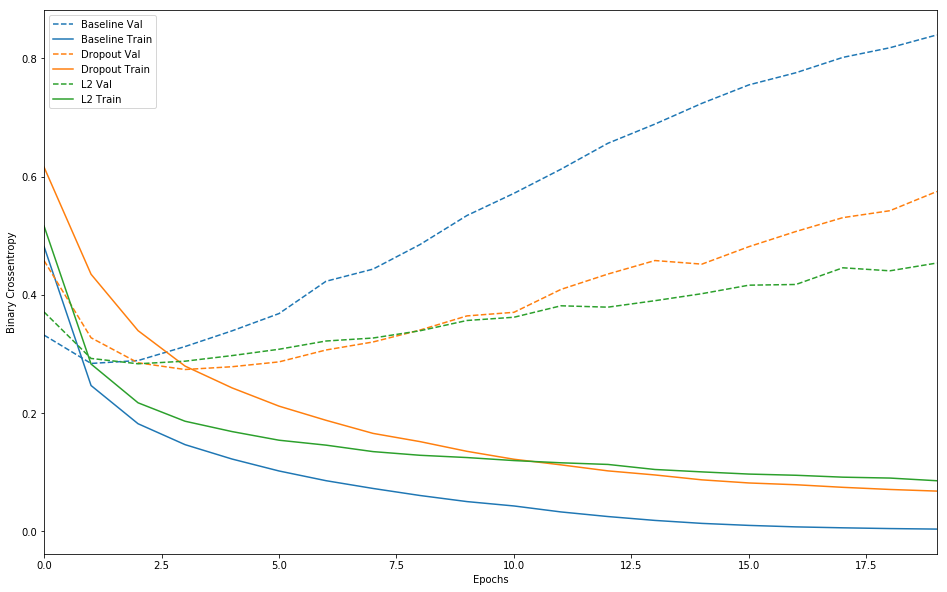

In [18]:
plot_history([('baseline', baseline_history),
             ('dropout', dropout_model_history),
             ('l2', l2_model_history)])